In [1]:
from plotnine import *
import pandas as pd

In [2]:
def show_error_rate(df):
    fold1_total_errs = df['fold_1_fp_errs'].sum() + df['fold_1_fn_errs'].sum()
    fold2_total_errs = df['fold_2_fp_errs'].sum() + df['fold_2_fn_errs'].sum()

    fold1_total_labels = df['fold_1_total_labels'].sum()
    fold2_total_labels = df['fold_2_total_labels'].sum()

    rate1 = 100*(fold1_total_labels - fold1_total_errs)/fold1_total_labels
    rate2 = 100*(fold2_total_labels - fold2_total_errs)/fold2_total_labels

    return rate1, rate2

In [3]:
BIC_df               = pd.read_csv('BIC.csv')
constant_df          = pd.read_csv('constant.csv')
Linear_HSE_df        = pd.read_csv('linear_nofilter_roundlambda_HSE.csv')
linear_MSE_df        = pd.read_csv('linear_filter_roundlambda_MSE.csv')
linear_HSE_filter_df = pd.read_csv('linear_filter_roundlambda_HSE.csv')

In [4]:
bic_rate1, bic_rate2                   = show_error_rate(BIC_df)
const_rate1, const_rate2               = show_error_rate(constant_df)
li_hse_nofil_rate1, li_hse_nofil_rate2 = show_error_rate(Linear_HSE_df)
li_mse_rate1, li_mse_rate2             = show_error_rate(linear_MSE_df)
li_hse_rate1, li_hse_rate2             = show_error_rate(linear_HSE_filter_df)

In [5]:
methods    = ['BIC.0', 'BIC.0',   'constant.1', 'constant.1', 'linear.2', 'linear.2',         'linear.2',   'linear.2']
algorithms = ['Paper', 'NoLearn', 'Paper',      'NoLearn',    'Paper',    'HSE_nofilter',     'HSE_filter', 'MSE']

In [6]:
acc_1      = [72.8,    bic_rate1,  73.4,         const_rate1,  78.9,       li_hse_nofil_rate1, li_hse_rate1, li_mse_rate1]
acc_2      = [53.7,    bic_rate2,  55.6,         const_rate2,  73.3,       li_hse_nofil_rate2, li_hse_rate2, li_mse_rate2]

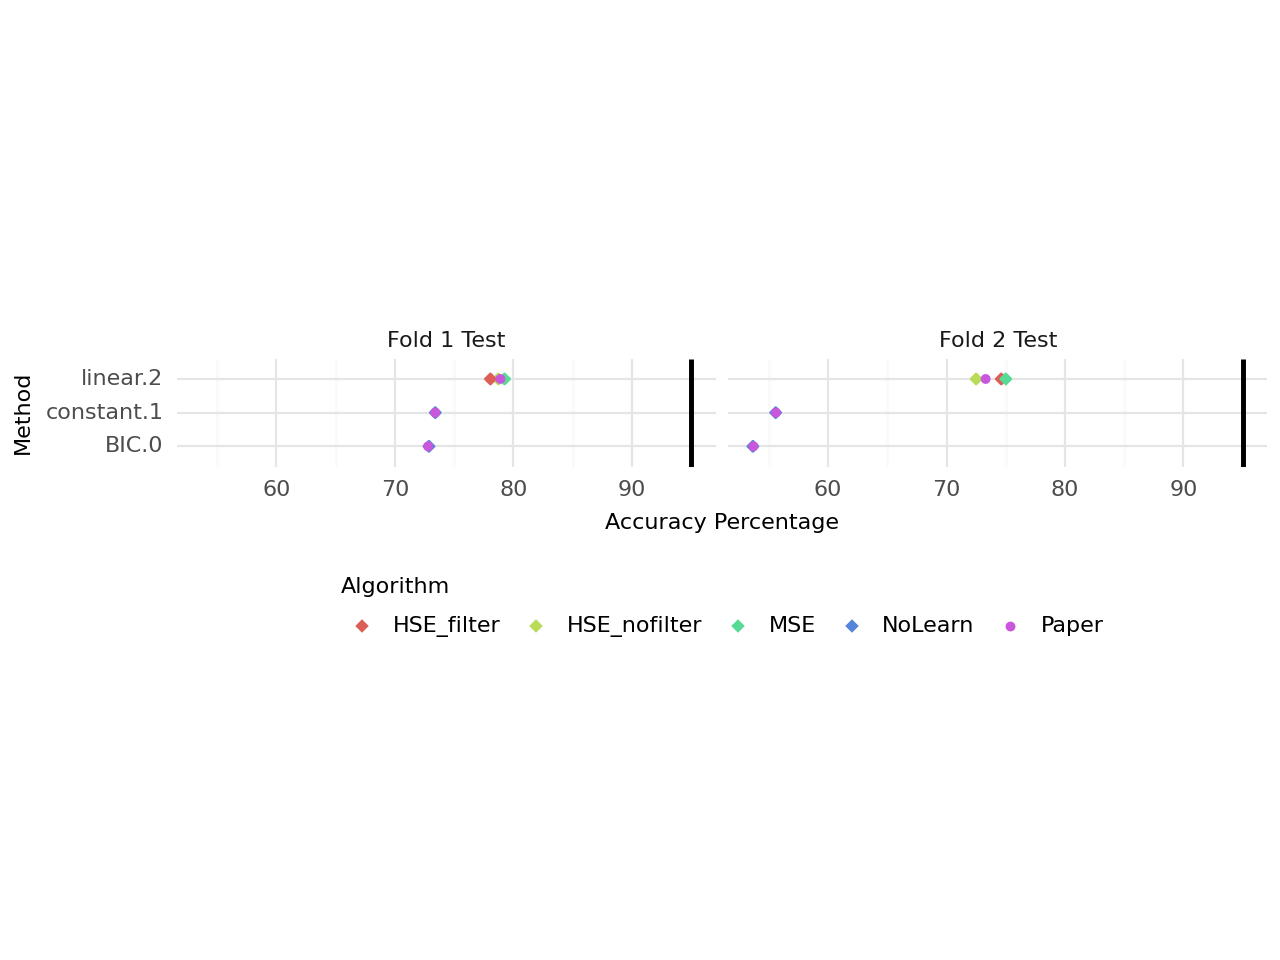

In [7]:
from plotnine import ggplot, aes, geom_point, labs, facet_wrap, geom_vline, theme_minimal, theme, element_text

# Creating sample data for fold 1
data_fold1 = pd.DataFrame({
    'Method':   methods,
    'Accuracy': acc_1,
    'Algorithm': algorithms,
    'Fold': 'Fold 1 Test'
})

# Creating sample data for fold 2
data_fold2 = pd.DataFrame({
    'Method': methods,
    'Accuracy': acc_2,
    'Algorithm': algorithms,
    'Fold': 'Fold 2 Test'
})

# Combining data for both folds
data = pd.concat([data_fold1, data_fold2])

# Plotting with different shapes for each algorithm
plot_combined = (ggplot(data, aes(x='Accuracy', y='Method', color='Algorithm', shape='Algorithm')) +
                 geom_point(size=1) +
                 labs(title="",
                      x="Accuracy Percentage",
                      y="Method",
                      color="Algorithm") +
                 facet_wrap('~Fold', ncol=2) +
                 geom_vline(xintercept=95, color="black", size=1) +
                 theme_minimal() +
                 theme(legend_position='bottom', text=element_text(size=8)) +
                 theme(aspect_ratio=0.2) +
                 scale_shape_manual(values=["D", "D", "D", "D", "o"])
                 )  # Adjust aspect ratio to decrease the distance between methods

# Displaying the combined plot
print(plot_combined)